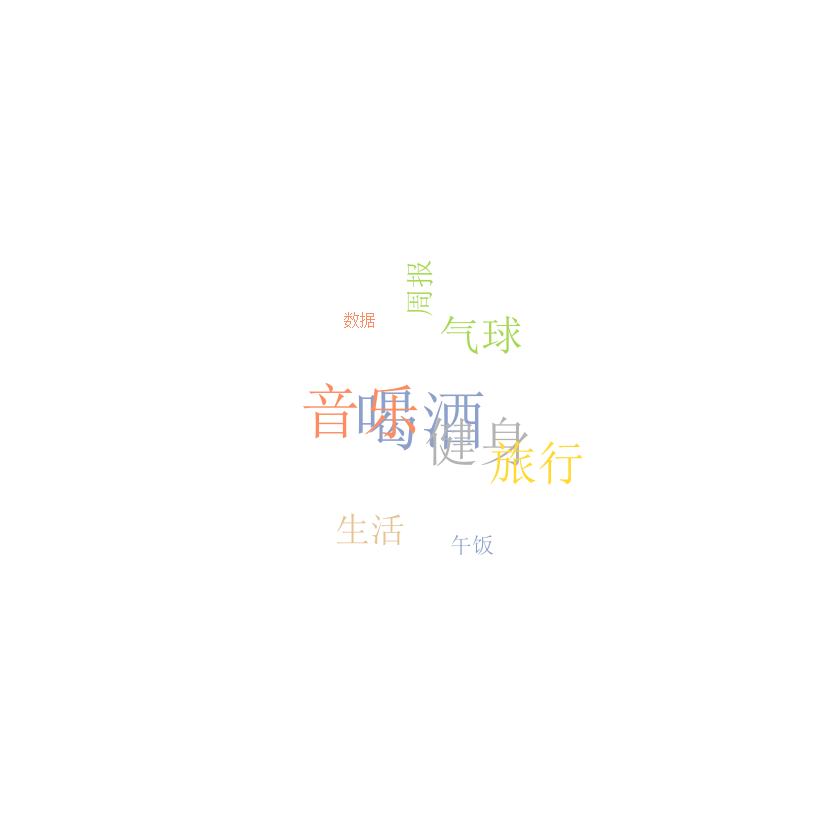

In [5]:
library(wordcloud)
library(RColorBrewer)
d = data.frame(x=c('冰激凌','数据','午饭','周报','生活','气球','旅行','健身','音乐','喝酒'),y=seq(1,100,by=10))
wordcloud(d$x, d$y, random.order=F, random.color=T,colors=brewer.pal(8,"Set2"))

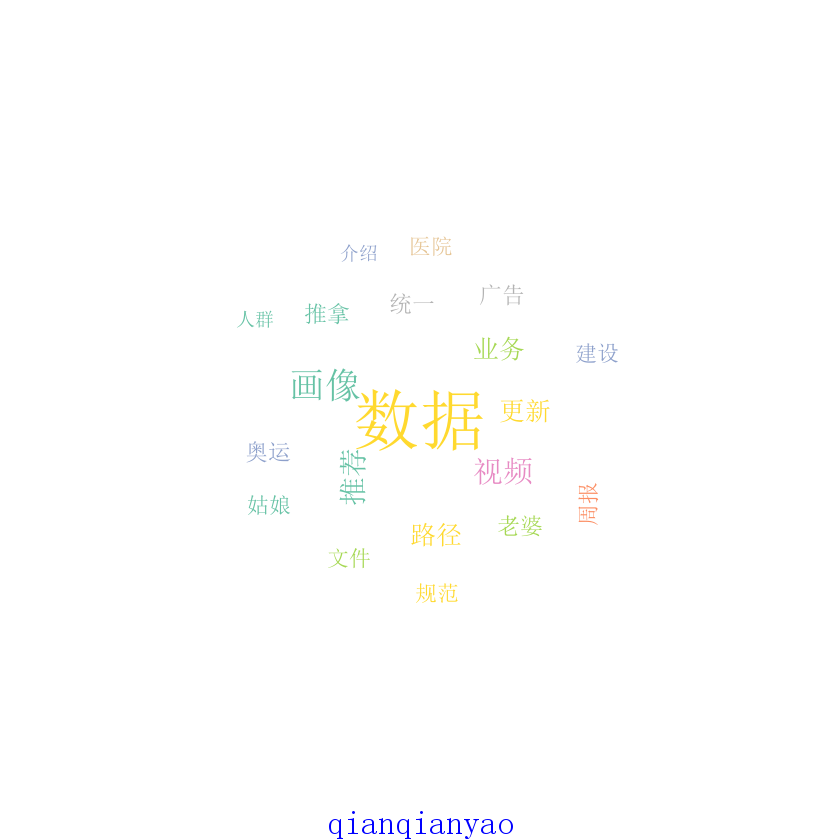

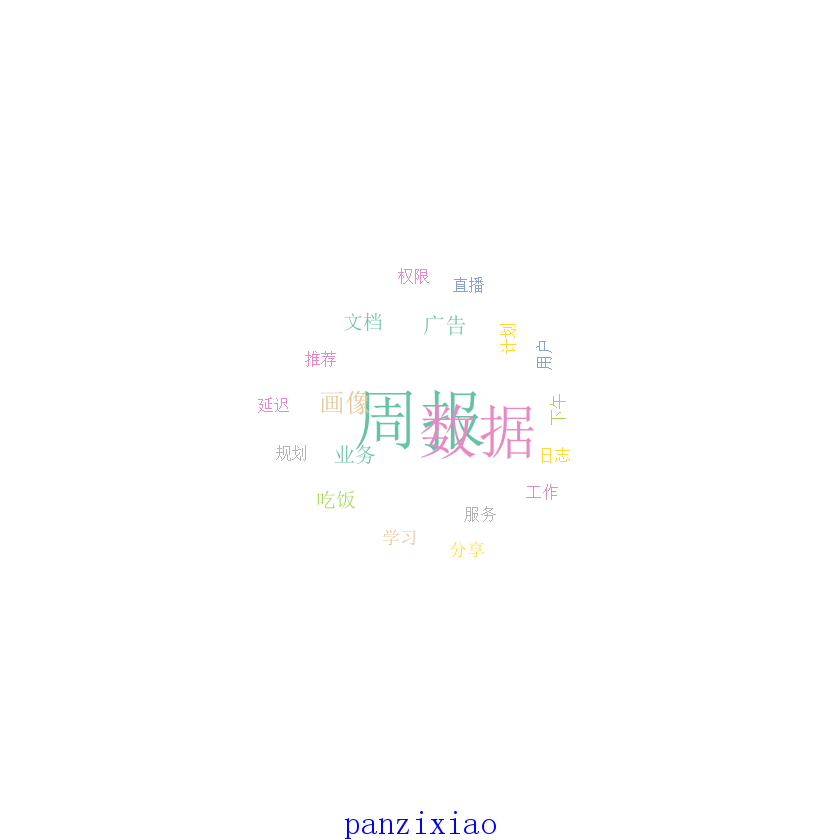

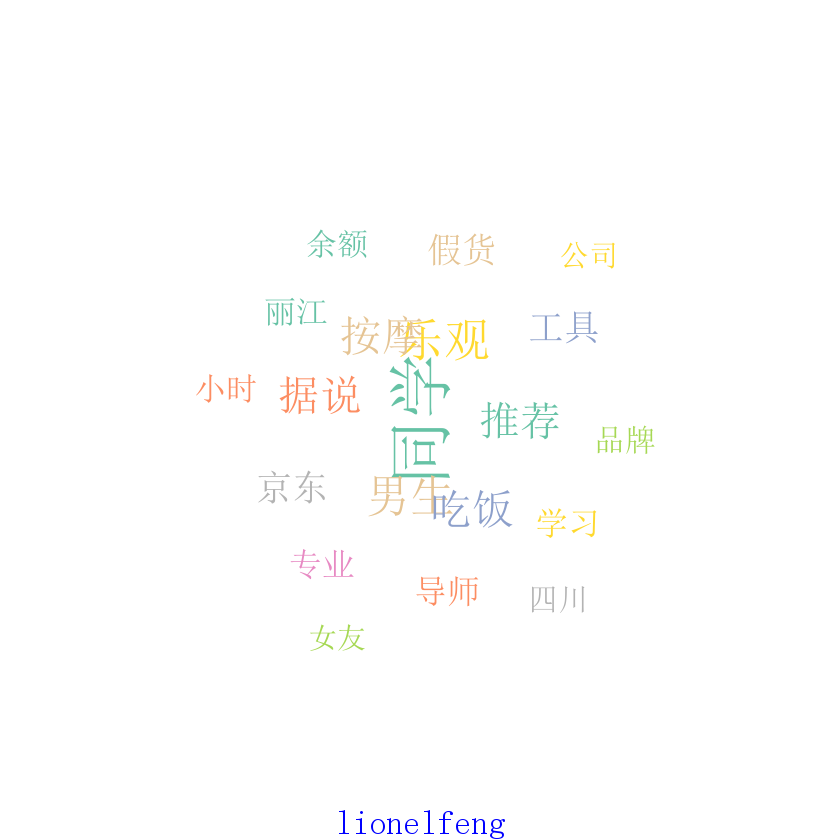

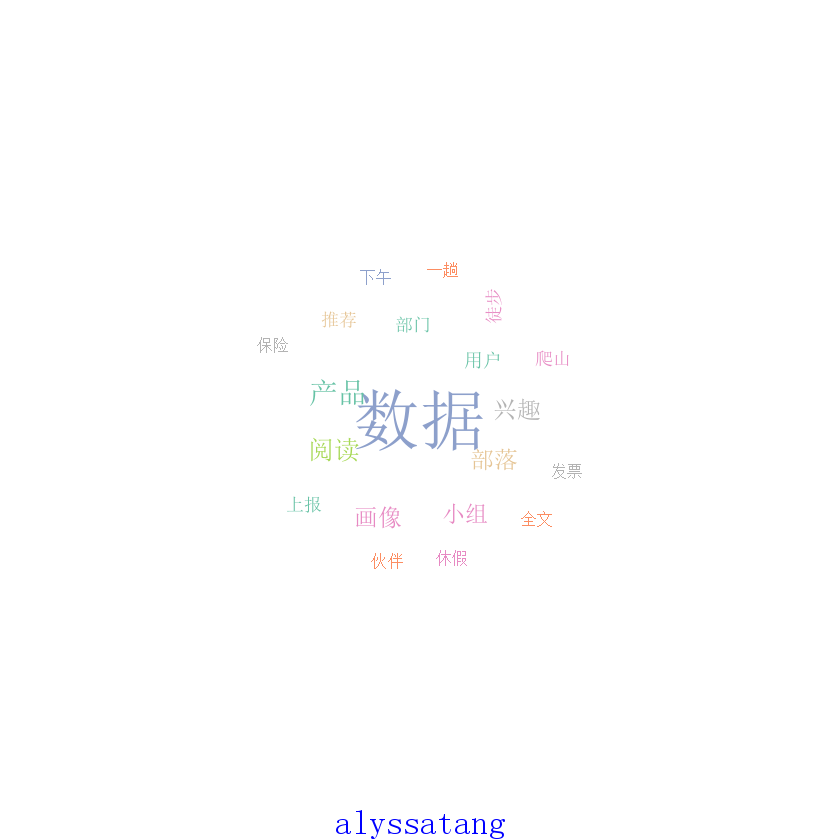

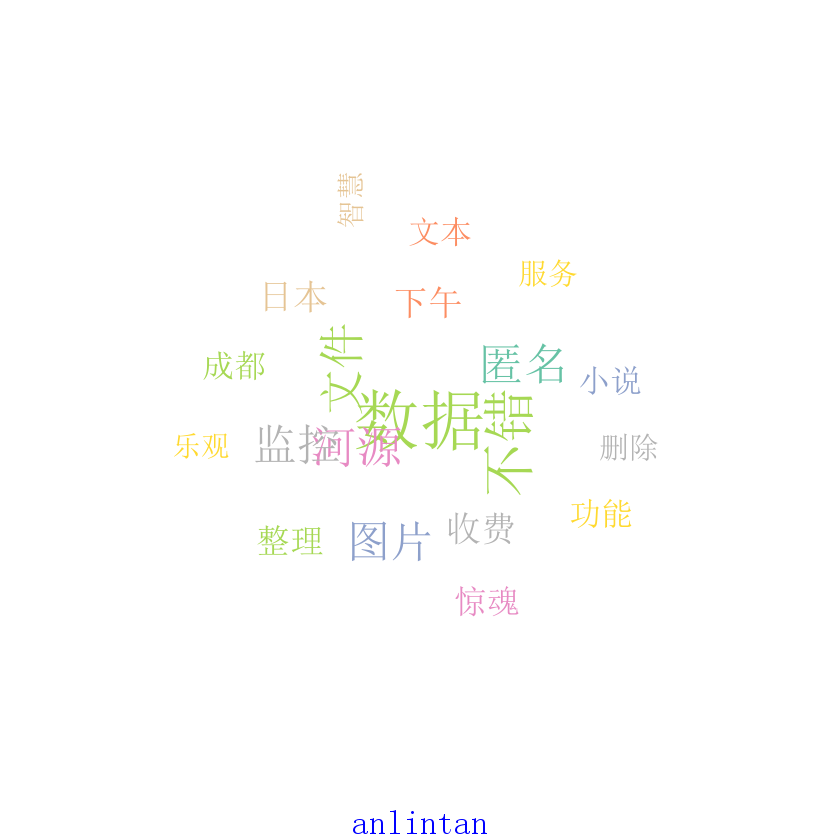

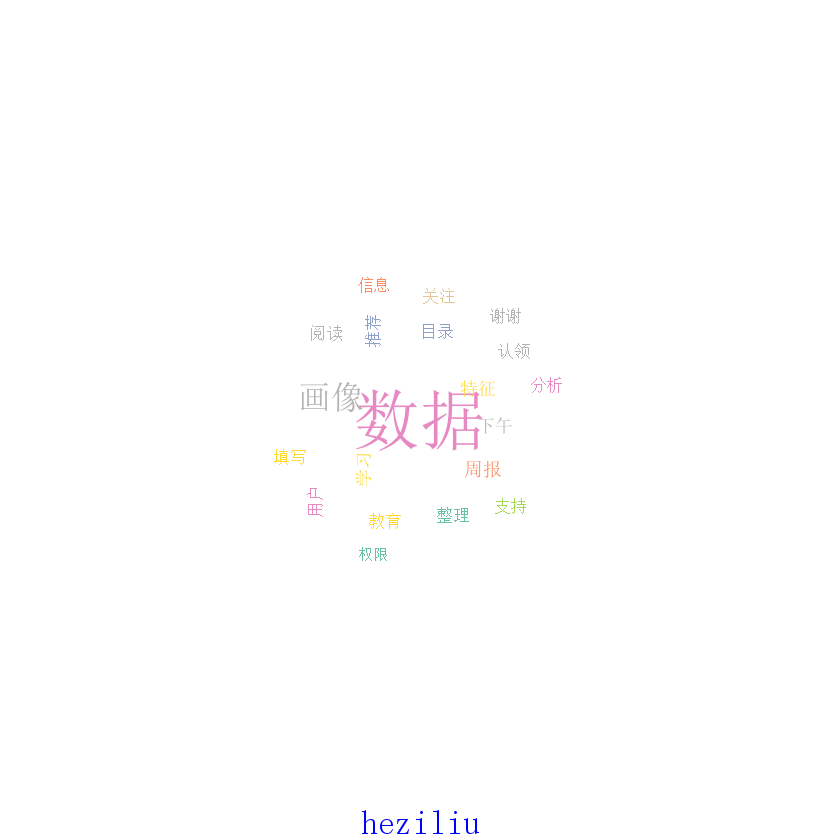

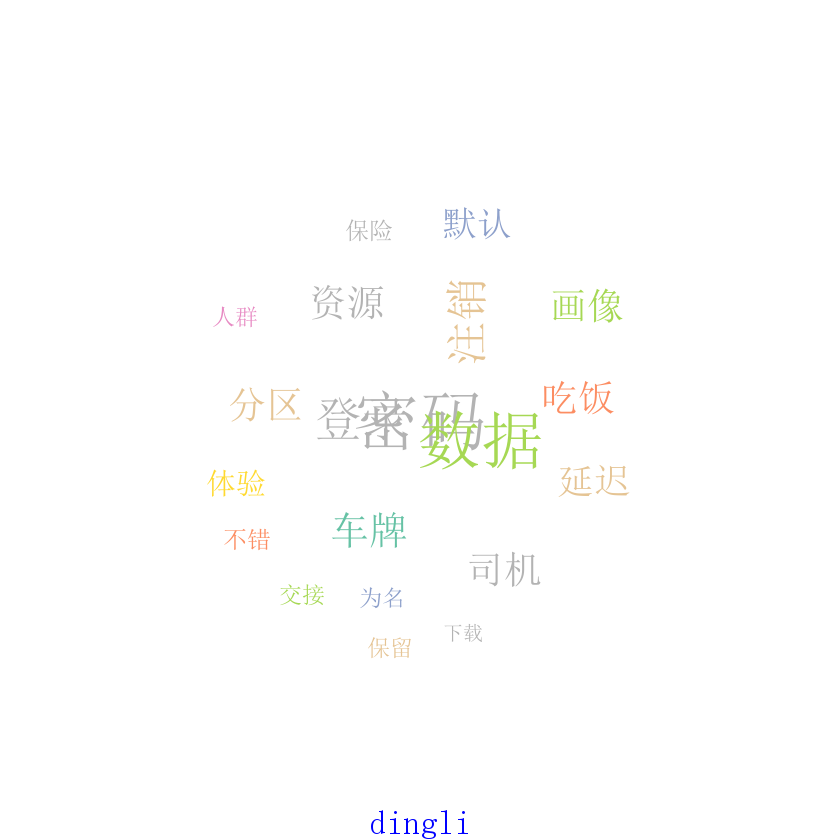

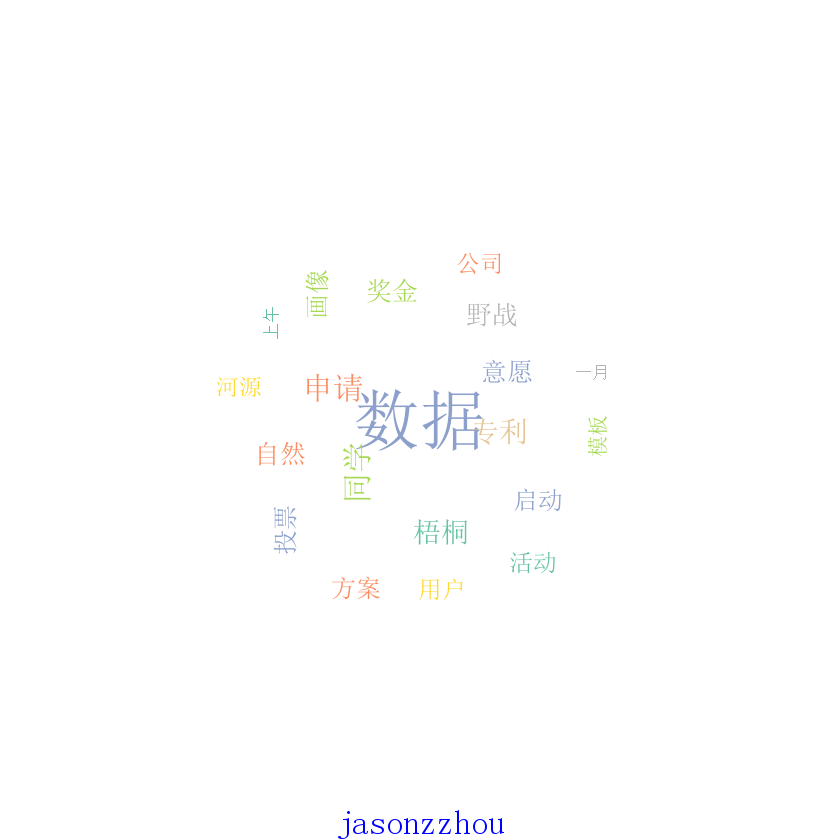

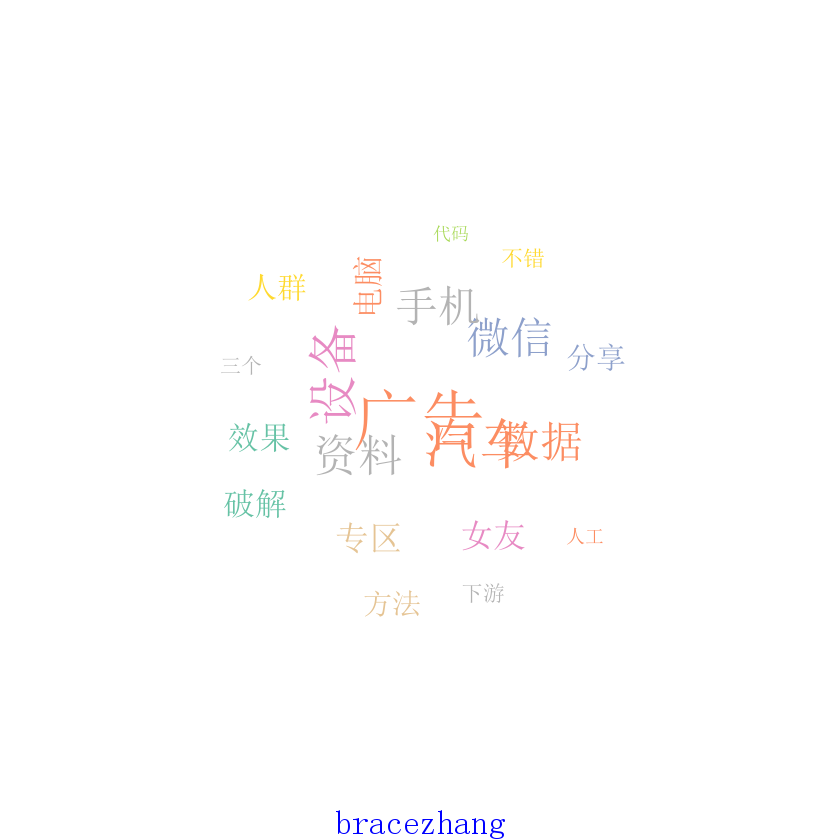

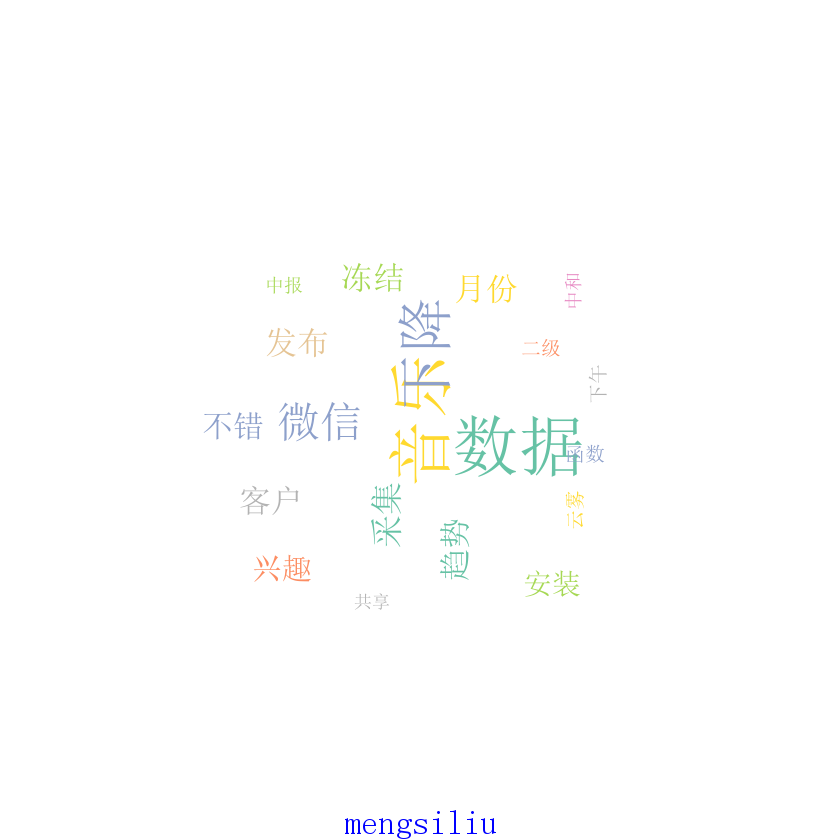

In [7]:
library(rJava)
library(Rwordseg)
library(tm)
library(wordcloud)
library(RColorBrewer)


#导入数据 聊天内容
d_log = read.csv("chat_log_201604-05.txt", encoding="UTF-8", sep="\t", quote = "" )
#导入数据 停用词 (来源：汤老师+网络+根据分词结果再次补充)
d_stopword = read.csv("stopwords.txt", fileEncoding="UTF-8" )
stop_word = as.character(d_stopword[,1])

#展示3*3的9张图，聊天记录共10个人，需剔除1人(我自己)
#Jupyter上，3*3显示的图片太小，调成2*2
#par(mfrow = c(2, 2))
op = par(bg = "gray18")

v_name = as.character(unique(d_log$user))
#v_name = v_name[c(1:8,10)]

i=1
while(i <= length(v_name) )
{
    user = as.character(v_name[i])
    
    log_user = d_log[d_log$user==v_name[i],]                                      #抽取聊天用户名单中的第i个人
    log_content = segmentCN( gsub("[0-9,a-z,A-Z]", "", log_user$content ))    #去除聊天内容中的英文和数字 进行中文分词
    log_content_stop = removeWords(unlist(log_content),stop_word)     #去除停用词
    
    
    word = lapply( X = log_content_stop, FUN = strsplit, " ")                   #将分词结果按空格分隔整理
    word_freq = sort( table( unlist( word )), decreasing = T)                   #计算每个单词的词频并按降序排列
    log_content_freq = data.frame( word = names( word_freq ), freq = word_freq, stringsAsFactors = F)

    #只对字符长度大于2个汉字 及 Top20的词进行展示
    log_content_freq = log_content_freq[ nchar( log_content_freq$word ) >= 2, ][1:20,1:2]
    log_output = data.frame( word = as.character( log_content_freq$word ),
                             freq = as.numeric( log_content_freq$freq ) )    #对词频放大10倍

    #title里有中文的时候，偶尔会报错，可能跟偏僻字有关，先把user中的英文部分解析出来，不显示中文名字
    v_attr = regexec('\\(', v_name[i])
    substring(v_name[i], 0, v_attr[[1]][1]-1)
       
    wordcloud(log_output$word, log_output$freq*6+rnorm(10), random.order=F, random.color=T,colors=brewer.pal(8,"Set2"))
    title(sub=substring(v_name[i], 0, v_attr[[1]][1]-1), col.sub = "blue", cex.sub =2)
    #title(main=substring(v_name[i], 0, v_attr[[1]][1]-1), col.main = "black")
    
    
    i=i+1
}
par(op)